In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing allows us to standarsize our data
from sklearn import preprocessing

# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split

# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV

# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression

# Support Vector Machine classification algorithm
from sklearn.svm import SVC

# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

Let's create a function for plotting confusion matrix

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, cmap = 'crest', ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    #ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [3]:
df = pd.read_csv('dataset_part_2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
X = pd.read_csv('dataset_part_3.csv')
X.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
Y = df['Class'].to_numpy()
Y = np.asarray(Y)
Y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [6]:
X_scaled = preprocessing.StandardScaler().fit_transform(X)
X_scaled[0:1]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.87082869e+00, -8.35531692e-01, -1.93309133e+00,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-0

### Logistic Regression

In [7]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_scaled,Y, test_size=.2, random_state = 2)

In [43]:
Ytest.shape

(18,)

In [44]:
Xtest.shape

(18, 80)

In [8]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

lr=LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [9]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8214285714285714


In [10]:
yhat=logreg_cv.predict(Xtest)

In [11]:
from sklearn import metrics

print(metrics.classification_report(Ytest, yhat))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [30]:
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(Ytest, yhat))

Logistic Regression's Accuracy:  0.8333333333333334


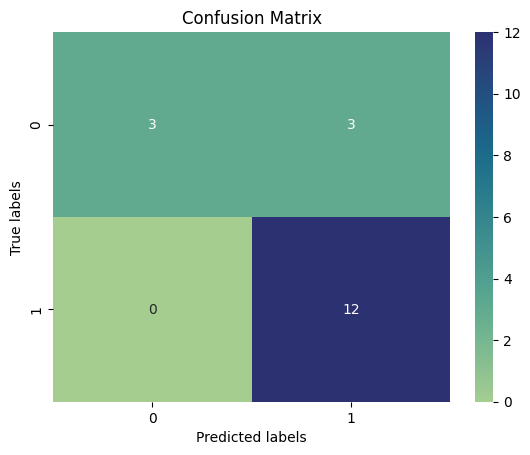

In [12]:
plot_confusion_matrix(Ytest, yhat)

In [56]:
lr1 = LogisticRegression(C= 1, penalty = 'l2', solver = 'lbfgs')
lr1.fit(Xtrain, Ytrain)

LogisticRegression(C=1)

In [57]:
yhat_lr1 = lr1.predict(Xtest)

In [58]:
metrics.accuracy_score(Ytest, yhat_lr1)

0.8333333333333334

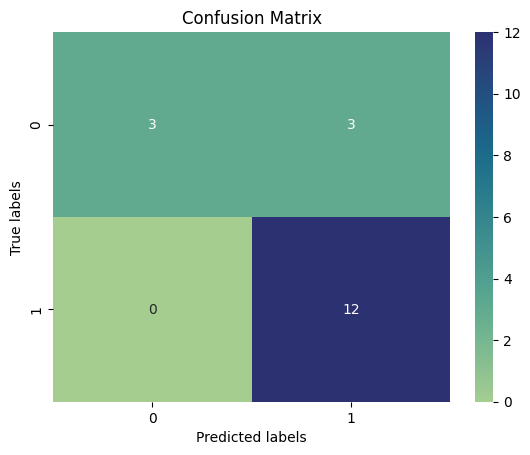

In [59]:
plot_confusion_matrix(Ytest, yhat_lr1)

### SVM model

In [13]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [14]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


In [15]:
yhat_svm = svm_cv.predict(Xtest)

In [28]:
print("SVM's Accuracy: ", metrics.accuracy_score(Ytest, yhat_svm))

SVM's Accuracy:  0.8333333333333334


In [16]:
print(metrics.classification_report(Ytest, yhat_svm))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



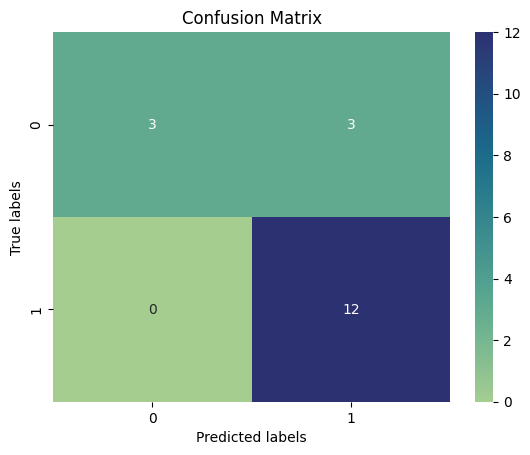

In [17]:
plot_confusion_matrix(Ytest, yhat_svm)

In [60]:
svm1 = SVC(C= 1.0, gamma= 0.03162277660168379, kernel = 'sigmoid')
svm1.fit(Xtrain, Ytrain)

SVC(gamma=0.03162277660168379, kernel='sigmoid')

In [61]:
yhat_svm1 = svm1.predict(Xtest)

In [63]:
metrics.accuracy_score(Ytest, yhat_svm1)

0.8333333333333334

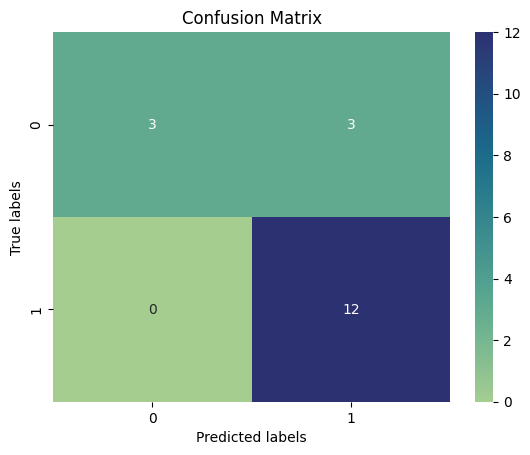

In [64]:
plot_confusion_matrix(Ytest, yhat_svm1)

### Decision tree Classifier

In [19]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(Xtrain, Ytrain)

c:\Users\Abhishek Daniel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Abhishek Daniel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Abhishek Daniel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Abhishek Daniel\AppData\Local\Programs\Pyth

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [20]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8607142857142858


In [21]:
yhat_tree = tree_cv.predict(Xtest)

In [47]:
yhat_tree

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [48]:
Ytest

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [26]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Ytest, yhat_tree))

DecisionTrees's Accuracy:  0.6666666666666666


In [24]:
print(metrics.classification_report(Ytest, yhat_tree))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.75      0.75      0.75        12

    accuracy                           0.67        18
   macro avg       0.62      0.62      0.62        18
weighted avg       0.67      0.67      0.67        18



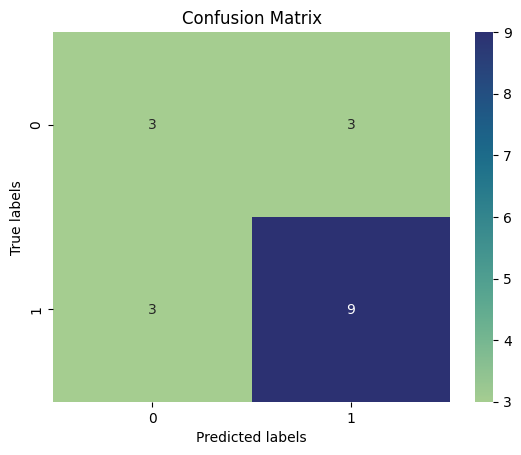

In [25]:
plot_confusion_matrix(Ytest, yhat_tree)

In [50]:
tree1 = DecisionTreeClassifier(criterion = 'gini',
                               max_depth = 18, 
                               max_features = 'sqrt', 
                               min_samples_leaf =  2, 
                               min_samples_split = 2, 
                               splitter = 'random')

tree1.fit(Xtrain, Ytrain)


DecisionTreeClassifier(max_depth=18, max_features='sqrt', min_samples_leaf=2,
                       splitter='random')

In [51]:
yhat_tree1 = tree1.predict(Xtest)

In [53]:
metrics.accuracy_score(Ytest, yhat_tree1)

0.8333333333333334

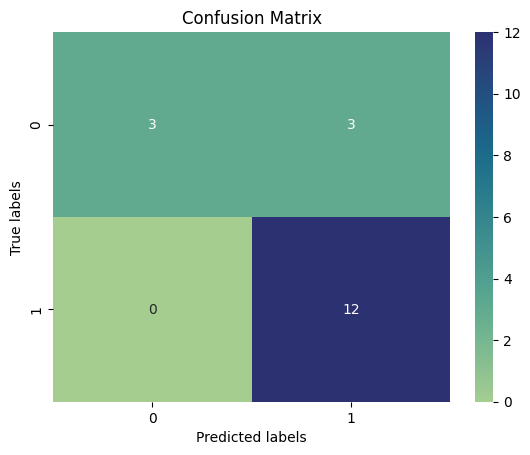

In [54]:
plot_confusion_matrix(Ytest, yhat_tree1)

### K-Nearest Neighbors

In [32]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [33]:
KNN_cv =GridSearchCV(KNN, parameters, cv=10)
KNN_cv.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [35]:
print("tuned hpyerparameters :(best parameters) ",KNN_cv.best_params_)
print("accuracy :",KNN_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
accuracy : 0.8339285714285714


In [38]:
yhat_knn = KNN_cv.predict(Xtest)

In [39]:
metrics.accuracy_score(Ytest, yhat_knn)

0.8333333333333334

In [41]:
print(metrics.classification_report(Ytest, yhat_knn))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



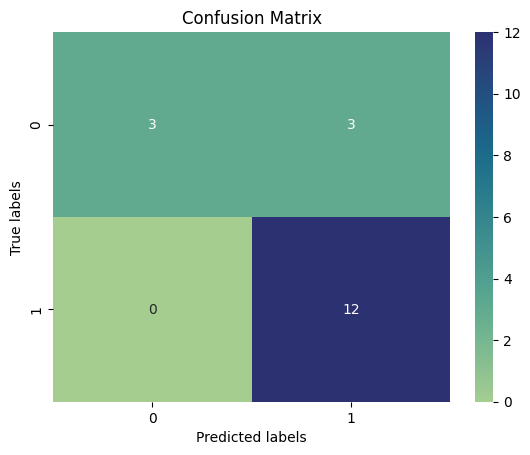

In [42]:
plot_confusion_matrix(Ytest, yhat_knn)

In [65]:
knn1 = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 6, p = 1)
knn1.fit(Xtrain, Ytrain)

KNeighborsClassifier(n_neighbors=6, p=1)

In [66]:
yhat_knn1 = knn1.predict(Xtest)

In [67]:
metrics.accuracy_score(Ytest, yhat_knn1)

0.8333333333333334

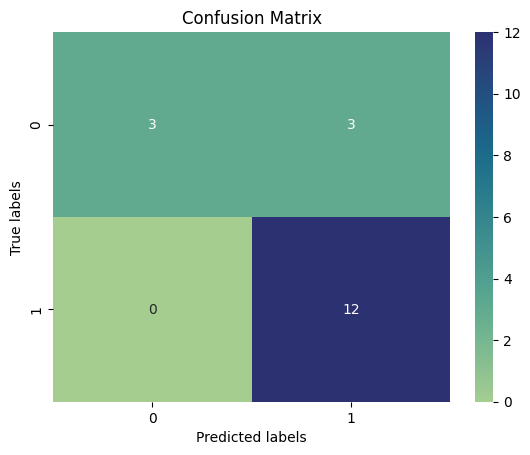

In [68]:
plot_confusion_matrix(Ytest, yhat_knn1)